In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

selected_features_mapping = {
'n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl': 1,
'n_flows,n_packets,n_bytes': 2,
'n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl': 3, 
'tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl': 4}

  
def print_graphs_and_tables(df, hyperparameters):
    fig, axes = plt.subplots(4, 2, figsize=(5*2, 4*4))
    axes = axes.flatten()

    if(len(hyperparameters) == 7):
        fig.delaxes(axes[7])
    
    for idx, param in enumerate(hyperparameters):
        sns.violinplot(data=df, x=param, y='F1_macro', ax=axes[idx])
        axes[idx].set_title(f'{'F1_macro'} x {param}')
    
    plt.tight_layout()
    plt.show()

    print("\n\n")
                      
    def format_first_col_value(x):
        return str(x)
    
    for param in hyperparameters:
        summary_table = (
            df
            .groupby(param)["F1_macro"]
            .agg(["mean", "median", "std", "max"])
            .reset_index()
        )
    
        first_col = summary_table.columns[0]
        summary_table[first_col] = summary_table[first_col].apply(format_first_col_value)
    
        print(f"\n===== Hyperparameter: {param} =====\n")
        print(tabulate(
            summary_table,
            headers="keys",
            tablefmt="fancy_grid",
            showindex=False,
            floatfmt=".4f",
            stralign="center",
            numalign="center"
        ))

    

In [2]:
df_results = pd.read_csv("rnn_type_nets_results.csv")
df_results['selected_features_mapped'] = df_results['selected_features'].map(selected_features_mapping)

## Top 10 models by the macro F1-score

In [3]:
df_results = df_results.sort_values(by='F1_macro',ascending = False)

In [4]:
df_results.head(10)

,F1_macro,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type,selected_features_mapped
6312,0.8359,1024,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
539,0.8356,256,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
4264,0.8353,512,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
3919,0.8345,512,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
8185,0.8335,256,0.2,64,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
9390,0.8331,256,0.5,128,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
6941,0.8328,1024,0.5,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
4146,0.8317,256,0.5,128,0.001,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
8226,0.8312,256,0.2,256,0.001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
3962,0.8311,512,0.5,128,0.001,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1


### Best model per RNN type

In [5]:
best_per_type = df_results.loc[df_results.groupby('type')['F1_macro'].idxmax()]
display(best_per_type)

,F1_macro,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type,selected_features_mapped
8670,0.8296,1024,0.2,128,0.0010,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",GRU,1
6312,0.8359,1024,0.5,128,0.0010,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",LSTM,1
566,0.8049,1024,0.5,512,0.0001,2,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",RNN,1


## Macro F1-score x hyperparameters graphs and tables for all types together

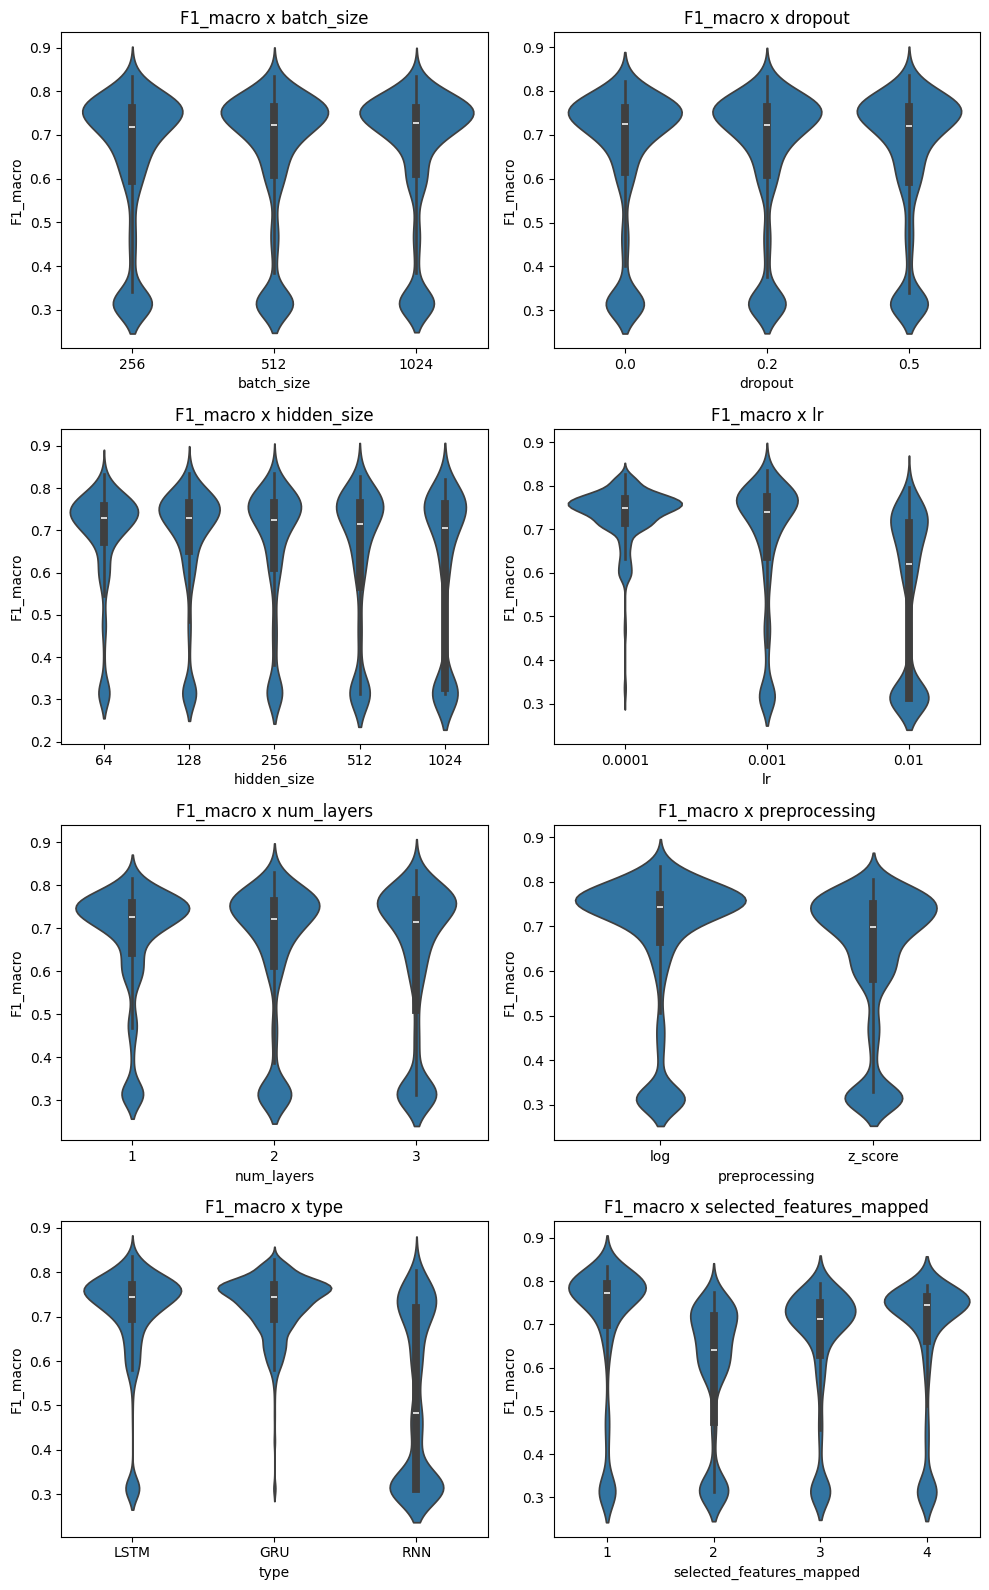





===== Hyperparameter: batch_size =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  batch_size  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     256      │ 0.6439 │  0.7178  │ 0.1675 │ 0.8356 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     512      │ 0.6512 │  0.7229  │ 0.1637 │ 0.8353 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1024     │ 0.6566 │  0.7269  │ 0.1600 │ 0.8359 │
╘══════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: dropout =====

╒═══════════╤════════╤══════════╤════════╤════════╕
│  dropout  │  mean  │  median  │  std   │  max   │
╞═══════════╪════════╪══════════╪════════╪════════╡
│  0.0000   │ 0.6525 │  0.7253  │ 0.1642 │ 0.8235 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.2000   │ 0.6521 │  0.7224  │ 0.1631 │ 0.8335 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.5000   │ 0.6470 │  0.7199  │ 0.1641 │ 0.8359 │
╘══════

In [6]:
hyperparameters = ['batch_size', 'dropout', 'hidden_size', 'lr', 'num_layers','preprocessing','type', 'selected_features_mapped']

print_graphs_and_tables(df_results,hyperparameters)

## Macro F1-score x hyperparameters graphs and tables for vanilla RNN networks

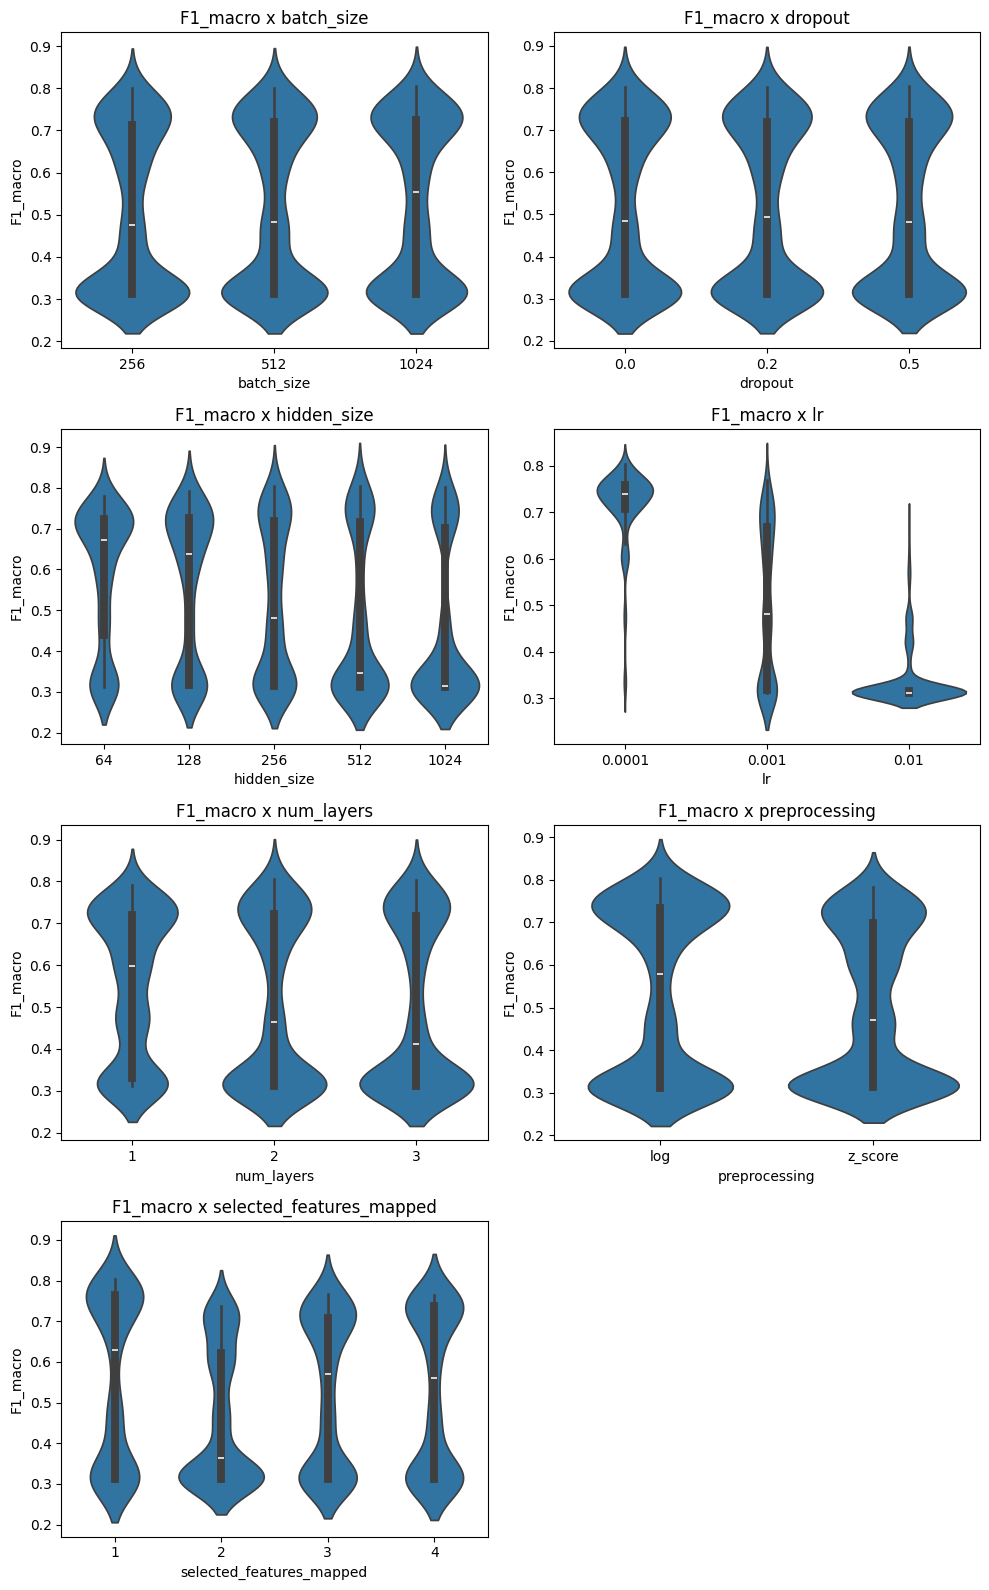





===== Hyperparameter: batch_size =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  batch_size  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     256      │ 0.5099 │  0.4747  │ 0.1891 │ 0.8011 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     512      │ 0.5210 │  0.4830  │ 0.1897 │ 0.8016 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1024     │ 0.5303 │  0.5529  │ 0.1901 │ 0.8049 │
╘══════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: dropout =====

╒═══════════╤════════╤══════════╤════════╤════════╕
│  dropout  │  mean  │  median  │  std   │  max   │
╞═══════════╪════════╪══════════╪════════╪════════╡
│  0.0000   │ 0.5225 │  0.4846  │ 0.1910 │ 0.8034 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.2000   │ 0.5219 │  0.4933  │ 0.1900 │ 0.8036 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.5000   │ 0.5168 │  0.4816  │ 0.1884 │ 0.8049 │
╘══════

In [7]:
hyperparameters.remove("type")

print_graphs_and_tables(df_results[df_results["type"] == "RNN"],hyperparameters)

## Macro F1-score x hyperparameters graphs and tables for GRU networks

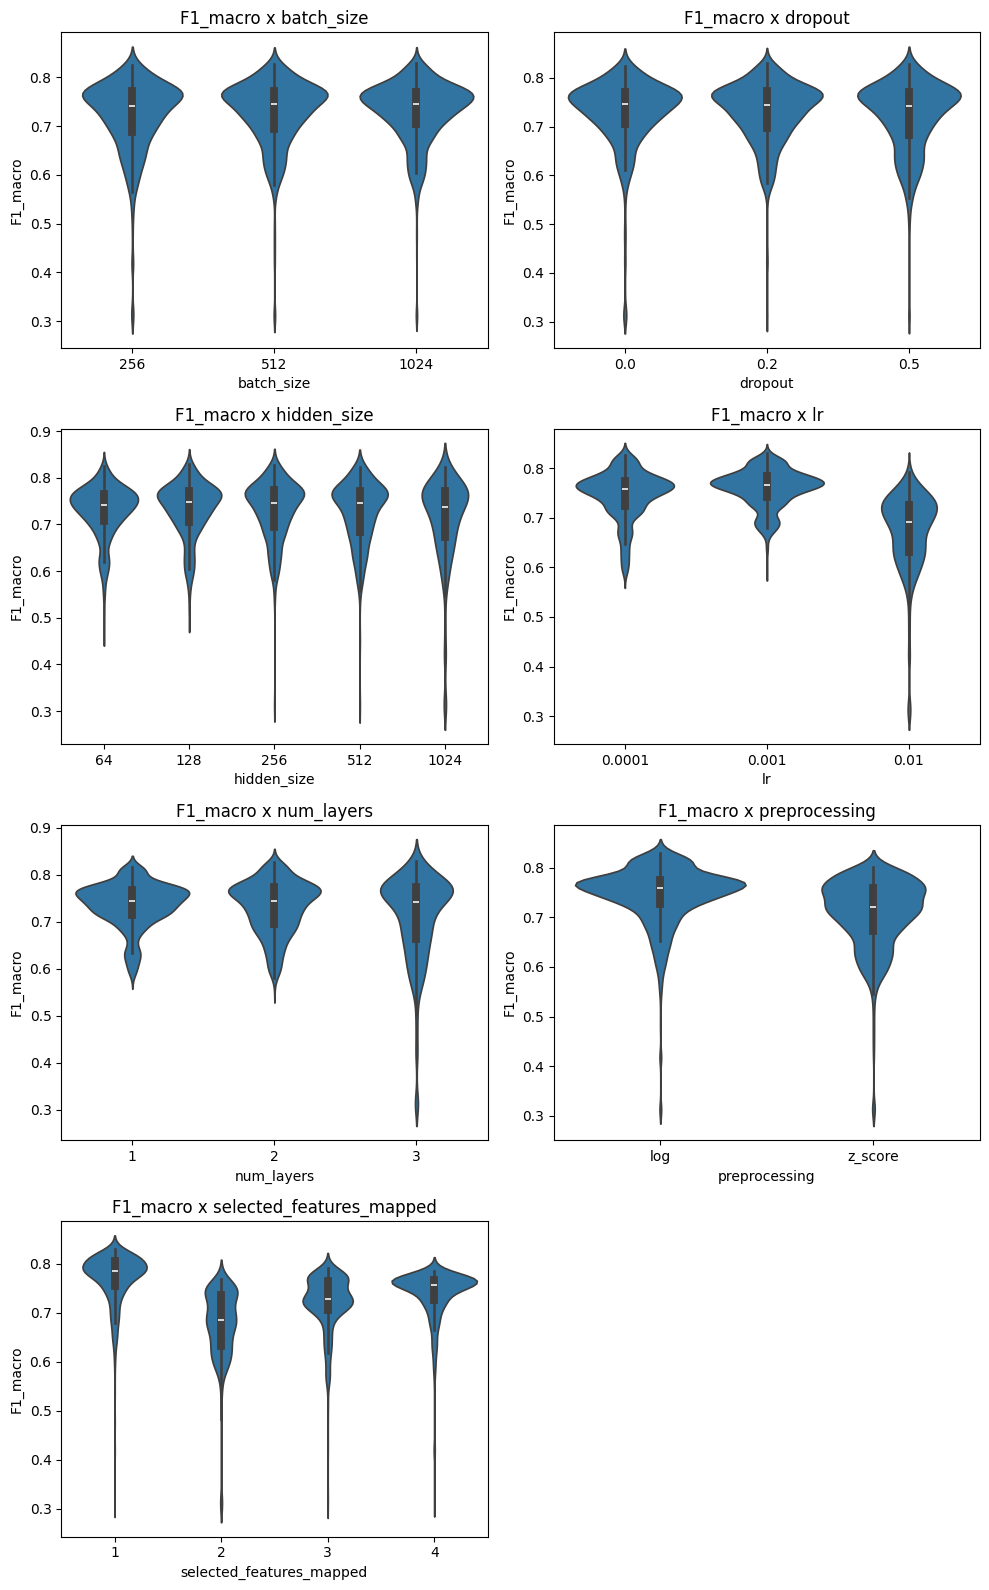





===== Hyperparameter: batch_size =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  batch_size  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     256      │ 0.7215 │  0.7414  │ 0.0754 │ 0.8253 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     512      │ 0.7263 │  0.7444  │ 0.0693 │ 0.8268 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1024     │ 0.7291 │  0.7442  │ 0.0643 │ 0.8296 │
╘══════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: dropout =====

╒═══════════╤════════╤══════════╤════════╤════════╕
│  dropout  │  mean  │  median  │  std   │  max   │
╞═══════════╪════════╪══════════╪════════╪════════╡
│  0.0000   │ 0.7274 │  0.7452  │ 0.0733 │ 0.8235 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.2000   │ 0.7288 │  0.7441  │ 0.0632 │ 0.8296 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.5000   │ 0.7207 │  0.7423  │ 0.0724 │ 0.8278 │
╘══════

In [8]:
print_graphs_and_tables(df_results[df_results["type"] == "GRU"],hyperparameters)

## Macro F1-score x hyperparameters graphs and tables for LSTM networks

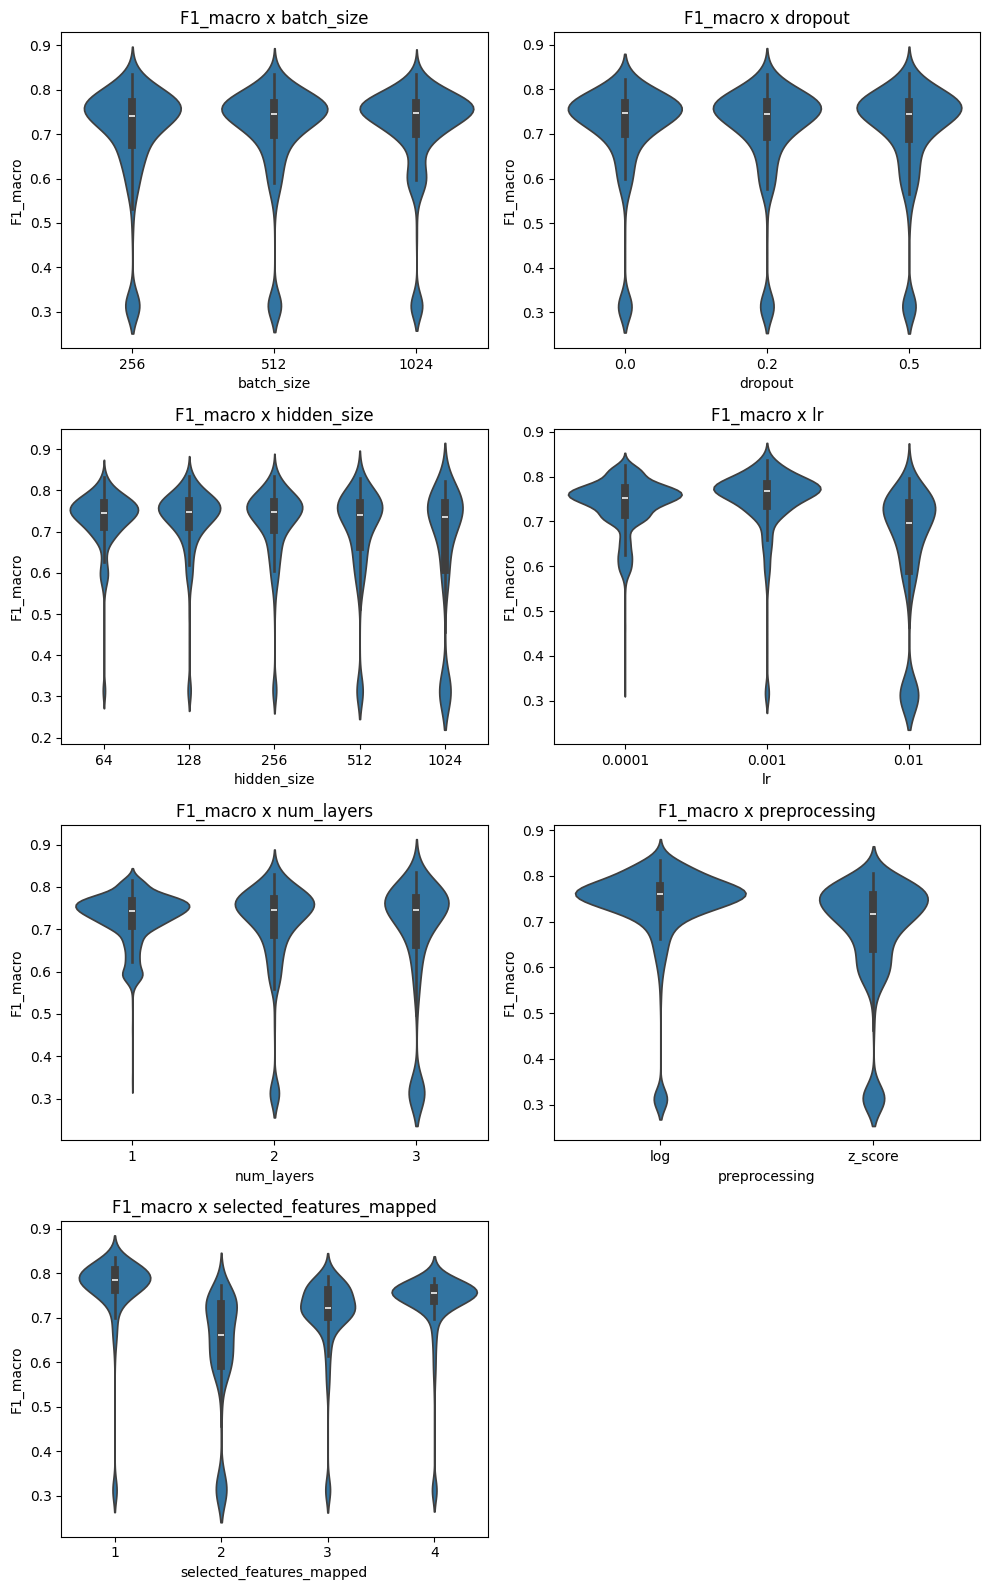





===== Hyperparameter: batch_size =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  batch_size  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     256      │ 0.7003 │  0.7419  │ 0.1246 │ 0.8356 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     512      │ 0.7063 │  0.7443  │ 0.1182 │ 0.8353 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1024     │ 0.7104 │  0.7471  │ 0.1116 │ 0.8359 │
╘══════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: dropout =====

╒═══════════╤════════╤══════════╤════════╤════════╕
│  dropout  │  mean  │  median  │  std   │  max   │
╞═══════════╪════════╪══════════╪════════╪════════╡
│  0.0000   │ 0.7077 │  0.7457  │ 0.1159 │ 0.8220 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.2000   │ 0.7057 │  0.7454  │ 0.1186 │ 0.8335 │
├───────────┼────────┼──────────┼────────┼────────┤
│  0.5000   │ 0.7035 │  0.7441  │ 0.1204 │ 0.8359 │
╘══════

In [9]:
print_graphs_and_tables(df_results[df_results["type"] == "LSTM"],hyperparameters)